# ML : Übung 2 Hauptkomponentenanalyse
-----------------------------------


# 1. Implementierung der Hauptkomponentenanalyse

#### b) Anwenden der Hauptkomponentenanalyse auf den Datensatz "Boston Housing"
Die Ergebnisse sind in einer Tabelle mit den Eigenwerten der Kovarianzmatrix, dem Anteil der zugehörigen Hauptkomponente an der Gesamtvarianz (“erklärte Varianz”) und der kumulativen erklärten Varianz dargestellt.

>###    Einbinden der Packages
Import Standardpakete für die Datenanalyse:  
Numpy für mehrdimensionale Arrays,   
Pandas für Datenanalyse in Tabellen,  
Matplotlib  
Sklearn

In [1]:
!pip install pandas numpy wget matplotlib sklearn
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import wget
from sklearn import preprocessing
from pca import pca

#np.__version__, pd.__version__

In [2]:
housing_filename = 'housing.data'

if not os.path.isfile(housing_filename):
    print("Downloading file...\n")
    wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', housing_filename)
    dateDownloaded = !date #Calling Linux
    print(dateDownloaded)

In [3]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
boston = pd.read_csv(housing_filename, sep=' ', skipinitialspace=True, header=None, names=cols + ['TGT'], index_col=False)

if boston.isna().values.any():
    boston = boston.dropna()

if boston.duplicated().any():
    boston = boston.drop_duplicates()

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
# Entfernen von TGT des DataFrames
boston_features = boston.drop(['TGT'], axis=1)

## Aufgabe b) Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?


In [16]:
dim_reduct = []

for r in range(1, boston_features.shape[1]+1):
    q_r, scores, std_abweichung, ges_var, scores_var, exp_var, error = pca(boston_features, r)
    dim_reduct.append({'r': r, 'kumulativen erklärte Varianz': np.sum(scores_var), 'erklärte Varianz': exp_var, 'error': error})
    
dim_reduct = pd.DataFrame(dim_reduct)
dim_reduct

,r,kumulativen erklärte Varianz,erklärte Varianz,error
0,1,6.138981,0.471296,6.886761
1,2,7.575094,0.581548,5.450648
2,3,8.820172,0.677134,4.205571
3,4,9.679445,0.743101,3.346298
4,5,10.515914,0.807318,2.509828
5,6,11.174623,0.857888,1.851119
6,7,11.711039,0.899069,1.314703
7,8,12.107921,0.929538,0.917822
8,9,12.385413,0.950841,0.640330
9,10,12.606087,0.967783,0.419656


## Aufgabe c) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

Text(0, 0.5, 'Principal components')

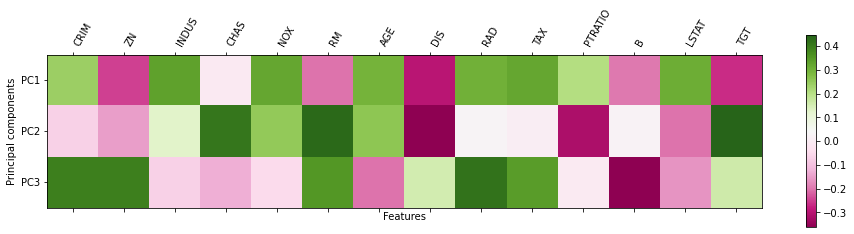

In [8]:
q_r, _, _, _, _, _, _ = pca(boston, 3)

plt.matshow(q_r.T, cmap='PiYG')
plt.yticks([0, 1, 2], ["PC1", "PC2", "PC3"])
plt.colorbar()
plt.xticks(range(len(list(boston))), list(boston), rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal components")

## Aufgabe d) Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar.

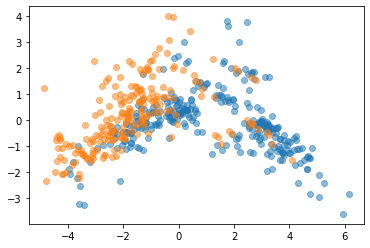

In [19]:
_, scores, _, _, _, _, _ = pca(boston_features, 2)

scores_df = pd.DataFrame(scores, columns=["PC1", "PC2"])
scores_df = pd.concat([scores_df, boston['TGT']], axis=1, sort=False)

tgt_below_mean = scores_df[scores_df['TGT'] < scores_df['TGT'].mean()]
tgt_above_mean = scores_df[scores_df['TGT'] >= scores_df['TGT'].mean()]

plt.scatter(x=tgt_below_mean['PC1'], y=tgt_below_mean['PC2'], alpha=0.5, c='tab:blue')
plt.scatter(x=tgt_above_mean['PC1'], y=tgt_above_mean['PC2'], alpha=0.5, c='tab:orange')